### DECISION TREES

In [68]:
import sys
sys.path.append("..")

import mglearn
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
import matplotlib.pyplot as plt
!pip install graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [69]:
path = '/Users/francescavasta/Desktop/ADSEM/II YEAR I SEM/UE 2 - Machine Learning /Machine Learning - TAXI PROJECT/data_clean.csv'
df_original = pd.read_csv(path)

In [70]:
# Overview of variables and NAs
list(df_original)
df_original.info()
df_original.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    object 
 2   Day_of_Week            983 non-null    object 
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    object 
 5   Weather                983 non-null    object 
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
 11  Trip_Distance_km_log   983 non-null    float64
 12  Trip_Price_log         983 non-null    float64
dtypes: float64(9), object(4)
memory usage: 100.0+ KB


,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Trip_Distance_km_log,Trip_Price_log
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,27.093997,2.497457,3.501745,1.242601,0.312278,64.034102,57.552115,3.069638,3.896462
std,20.176399,1.082044,0.848856,0.474686,0.250331,35.955663,41.553535,0.795551,0.583602
min,1.230000,1.000000,2.010000,0.336846,0.078955,5.010000,2.601000,0.802002,1.281212
25%,12.185000,2.000000,2.770000,0.855000,0.190000,36.420000,33.390700,2.579079,3.537786
50%,25.630000,3.000000,3.500522,1.210000,0.290000,62.170000,50.241200,3.282038,3.936544
75%,38.340000,3.000000,4.200000,1.610000,0.400000,89.640000,69.577450,3.672242,4.256710
max,146.067047,4.000000,5.000000,5.262560,4.995513,323.485000,332.043689,4.990889,5.808274


In [71]:
# Create a copy to avoid modifying the original dataframe
df_linear_model = df_original.copy()

# Drop the original non-log transformed columns
#df_linear_model = df_linear_model.drop(['Trip_Distance_km', 'Trip_Price'], axis=1)

# Drop the original log transformed columns (because the log trasformation might interfere with outliers identification)
df_linear_model = df_linear_model.drop(['Trip_Distance_km_log', 'Trip_Price_log'], axis=1)

In [72]:
from sklearn.preprocessing import LabelEncoder

# Creazione di un encoder
encoder = LabelEncoder()

# Create dummy variables for categorical columns
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Create dummies and drop first category for each variable
for column in categorical_columns:
    df_linear_model[column] = encoder.fit_transform(df_linear_model[column])

df_linear_model.info()
df_linear_model.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       983 non-null    float64
 1   Time_of_Day            983 non-null    int64  
 2   Day_of_Week            983 non-null    int64  
 3   Passenger_Count        983 non-null    float64
 4   Traffic_Conditions     983 non-null    int64  
 5   Weather                983 non-null    int64  
 6   Base_Fare              983 non-null    float64
 7   Per_Km_Rate            983 non-null    float64
 8   Per_Minute_Rate        983 non-null    float64
 9   Trip_Duration_Minutes  983 non-null    float64
 10  Trip_Price             983 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 84.6 KB


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.2624
1,47.590000,0,0,1.0,0,0,3.500522,0.62,0.43,40.57,29.5058
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.9032
3,30.330000,1,0,4.0,1,0,3.480000,0.51,0.15,116.81,36.4698
4,8.263492,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.6180


In [73]:
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for column in categorical_columns:
    print(f"Mapping for the column '{column}':\n", mapping)

Mapping for the column 'Time_of_Day':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}
Mapping for the column 'Day_of_Week':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}
Mapping for the column 'Traffic_Conditions':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}
Mapping for the column 'Weather':
 {'Clear': 0, 'Rain': 1, 'Snow': 2}


In [74]:
outliers_indexes= [12,  13,  20,  33,  72, 132, 161, 179, 188, 201, 223, 231, 233, 243,
       264, 286, 292, 300, 301, 305, 324, 346, 357, 413, 430, 474, 476, 483,
       485, 522, 525, 535, 547, 565, 596, 660, 680, 690, 752, 781] #outliers found with the OLS


#remove outliers from a copy of the oroginal dataframe
df_model_cleaned = df_linear_model.copy()

# Rimuovi gli outliers dal dataset originale (o dalla sua copia)
df_model_cleaned = df_model_cleaned.drop(index=outliers_indexes)

df_model_cleaned.shape

df_model_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 0 to 982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       943 non-null    float64
 1   Time_of_Day            943 non-null    int64  
 2   Day_of_Week            943 non-null    int64  
 3   Passenger_Count        943 non-null    float64
 4   Traffic_Conditions     943 non-null    int64  
 5   Weather                943 non-null    int64  
 6   Base_Fare              943 non-null    float64
 7   Per_Km_Rate            943 non-null    float64
 8   Per_Minute_Rate        943 non-null    float64
 9   Trip_Duration_Minutes  943 non-null    float64
 10  Trip_Price             943 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 88.4 KB


In [75]:
#Scale numerical features only (not using log)
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                    'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']


#set the scaler 
scaler = StandardScaler()
df_model_scaled = df_linear_model.copy()
df_model_scaled[numerical_columns] = scaler.fit_transform(df_linear_model[numerical_columns])

X = df_model_scaled.drop('Trip_Price', axis=1)
y = df_model_scaled['Trip_Price']




In [76]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) 

In [77]:
# --- Case 1: No specified depth of the tree ---

# Instantiate the model
model_1 = DecisionTreeRegressor(random_state=0)

# Note: here we do not specify the depth of the tree, so nodes are expanded until all leaves are pure
# or until all leaves contain less than min_samples_split observations (default=2)

# Fit the model
model_1.fit(X_train, y_train)

# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(model_1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_1.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.817


Feature importances:
[7.10063322e-01 4.73732973e-03 2.53933096e-04 2.04708812e-03
 5.60495098e-03 1.32673777e-03 2.90137825e-02 1.08097444e-01
 4.47409788e-02 9.41144322e-02]


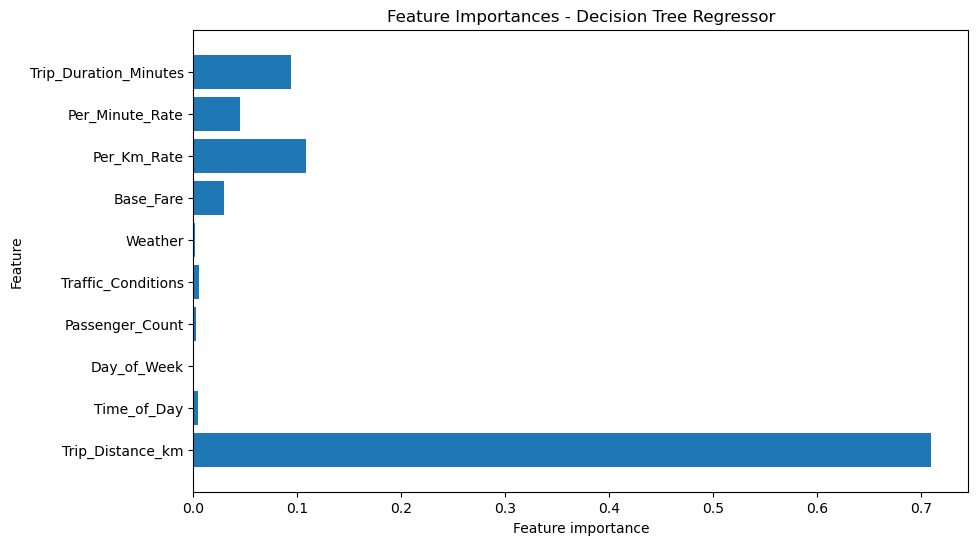

In [78]:
# Report the feature importances
print("Feature importances:")
print(model_1.feature_importances_)

# Funzione per visualizzare l'importanza delle feature
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)  # Per visualizzare tutte le feature
    plt.title("Feature Importances - Decision Tree Regressor")
    plt.show()

# Visualizza le importanze delle feature usando il nome delle colonne di X_train
plot_feature_importances(model_1, X_train.columns)

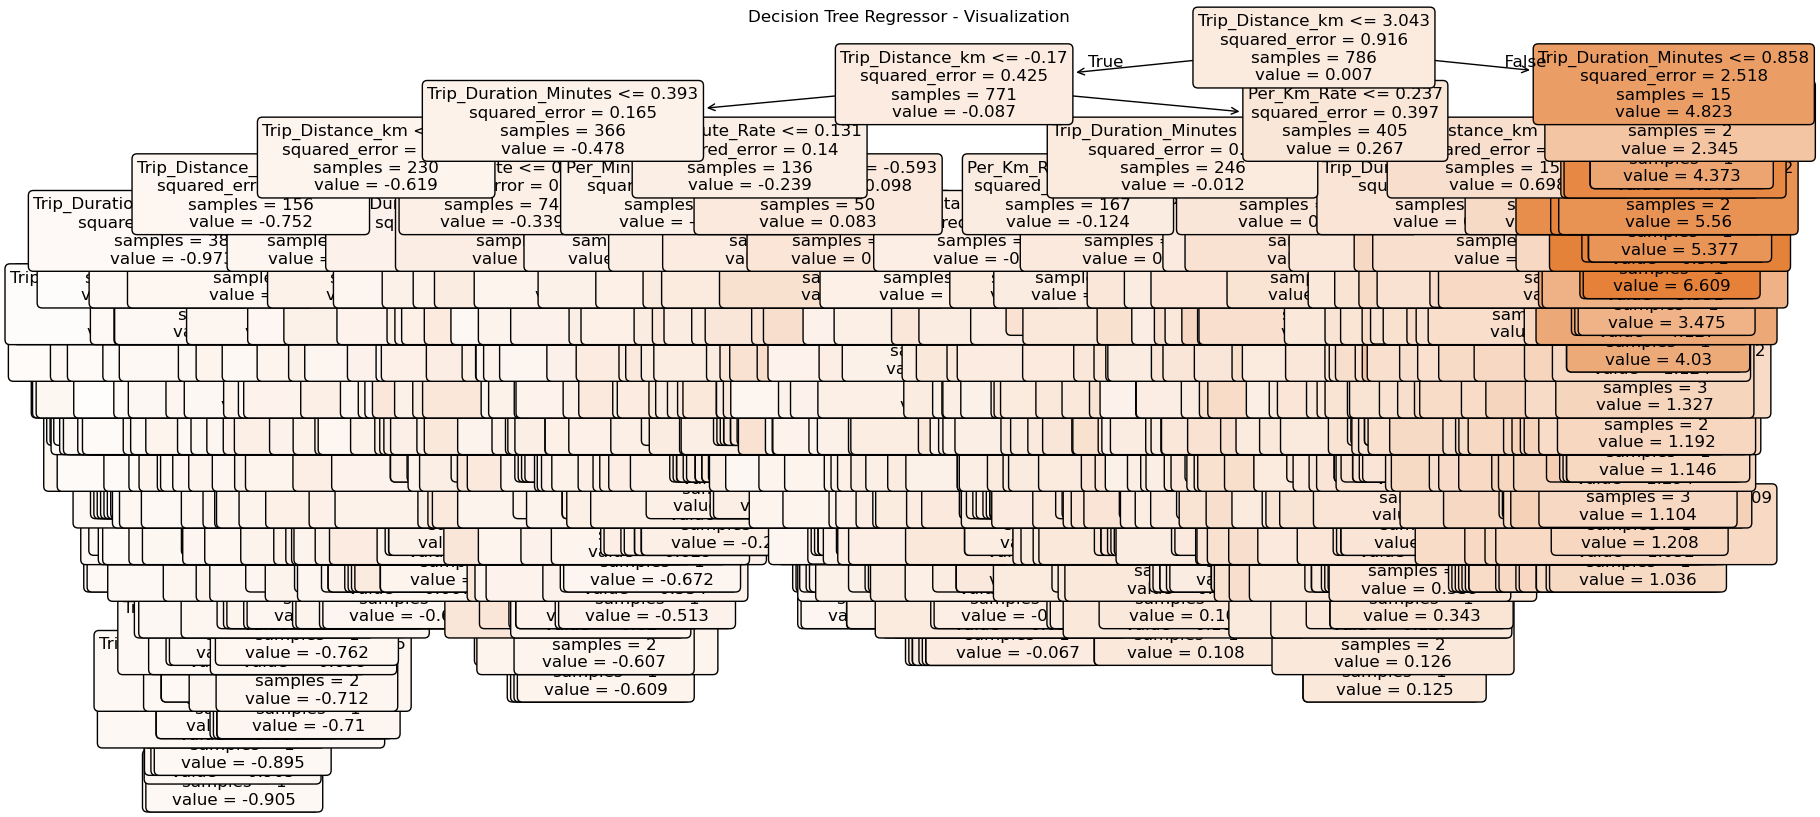

In [79]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizza l'albero decisionale
plt.figure(figsize=(20, 10)) 
plot_tree(model_1,  # il modello di regressione DecisionTree
          filled=True,  
          feature_names=X_train.columns,  # usa i nomi delle colonne del DataFrame X_train
          rounded=True,  
          fontsize=12)  # Imposta la dimensione del font
plt.title("Decision Tree Regressor - Visualization")
plt.show()

In [80]:
# --- Case 2: Fixed depth of the tree ---

# Instantiate the model and specify the maximum depth
model_2 = DecisionTreeRegressor(max_depth=4, random_state=0)

# Fit the model
model_2.fit(X_train, y_train)
 
# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(model_2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model_2.score(X_test, y_test)))

Accuracy on training set: 0.826
Accuracy on test set: 0.767


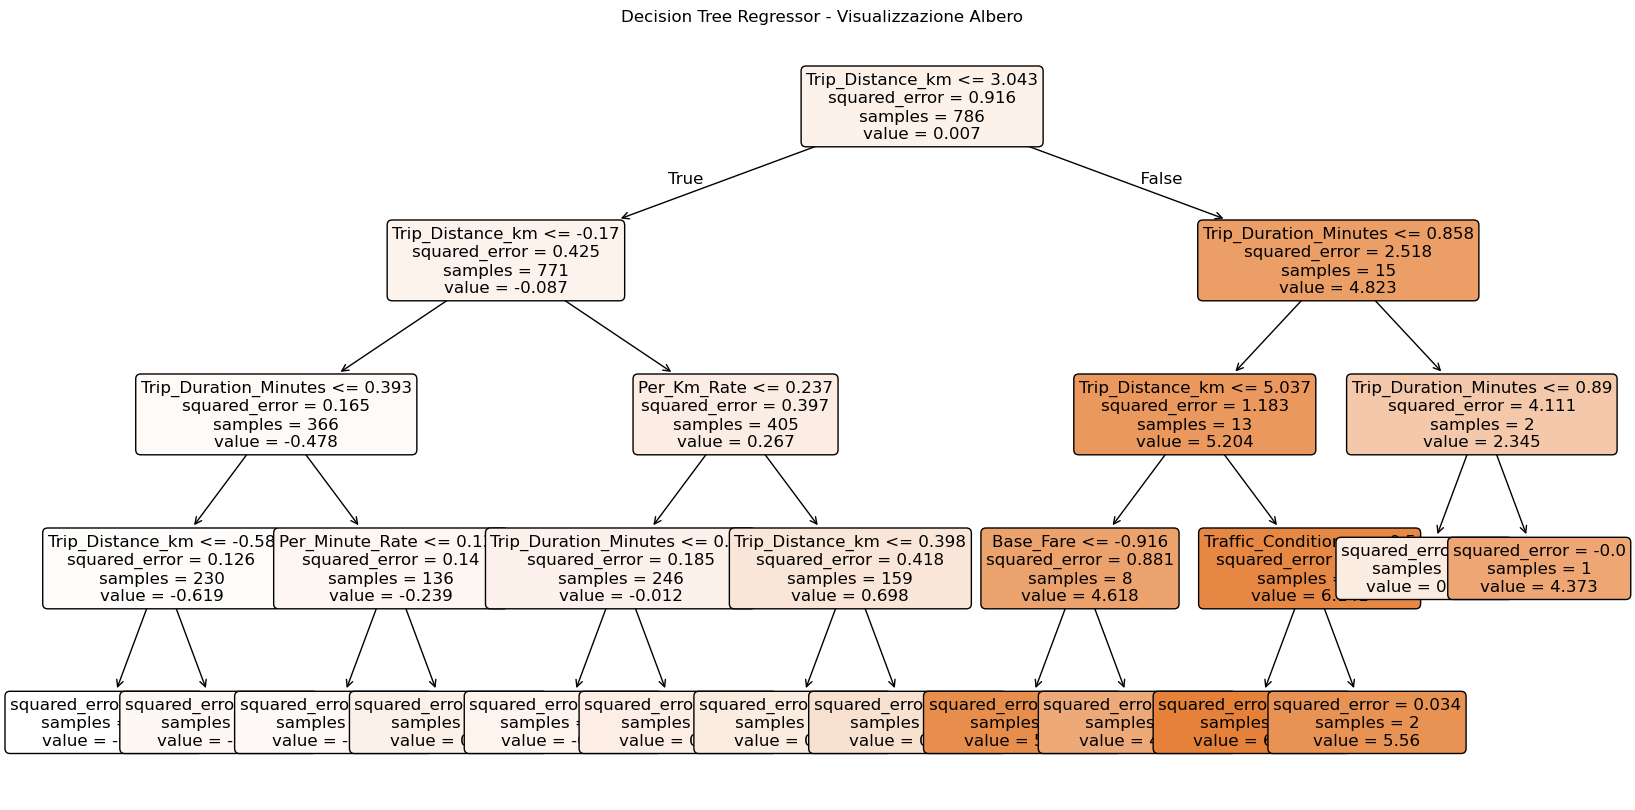

In [81]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizza l'albero decisionale
plt.figure(figsize=(20, 10)) 
plot_tree(model_2,  # il modello di regressione DecisionTree
          filled=True,  
          feature_names=X_train.columns,  # usa i nomi delle colonne del DataFrame X_train
          rounded=True,  
          fontsize=12)  # Imposta la dimensione del font
plt.title("Decision Tree Regressor - Visualizzazione Albero")
plt.show()

Feature importances:
[0.82674055 0.         0.         0.         0.00188988 0.
 0.00631476 0.08194661 0.0137518  0.0693564 ]


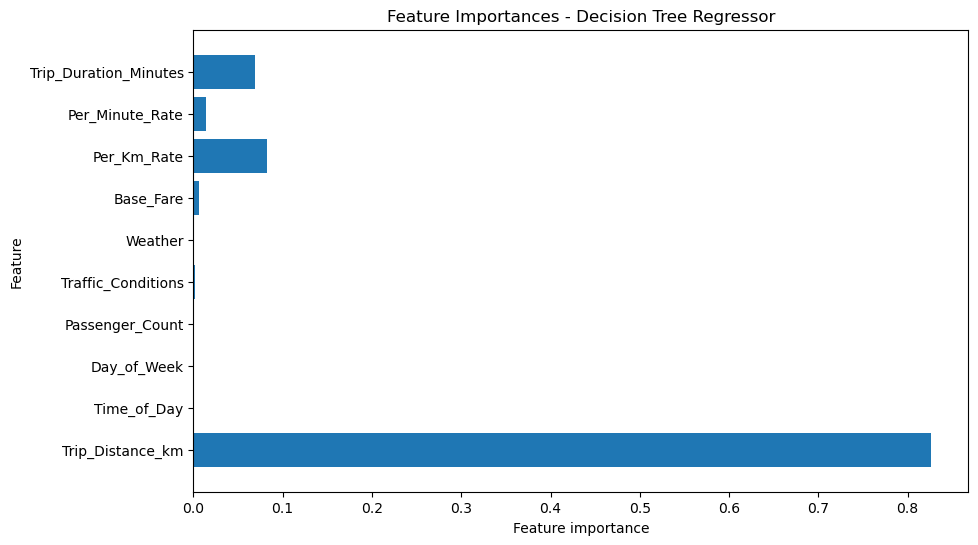

In [82]:
# Report the feature importances
print("Feature importances:")
print(model_2.feature_importances_)

# Funzione per visualizzare l'importanza delle feature
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 6))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)  # Per visualizzare tutte le feature
    plt.title("Feature Importances - Decision Tree Regressor")
    plt.show()

# Visualizza le importanze delle feature usando il nome delle colonne di X_train
plot_feature_importances(model_2, X_train.columns)

## Cost complexity pruning

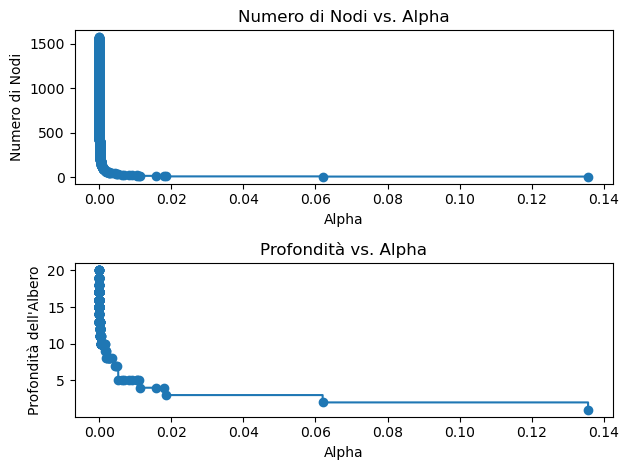

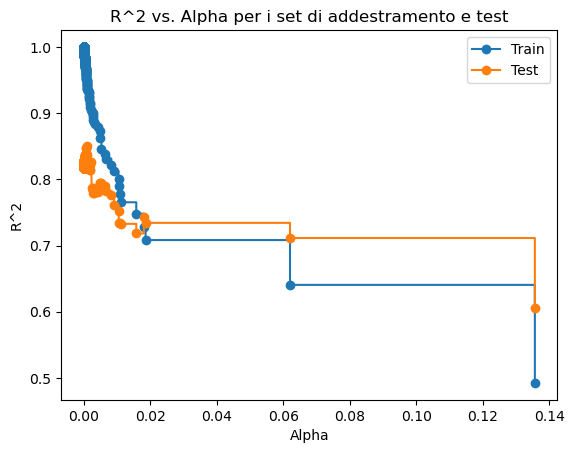

In [83]:

# Inizializza il modello prima di calcolare il percorso di pruning
tree = DecisionTreeRegressor(random_state=0)

# Calcola la sequenza di possibili valori di alpha
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Alcune note:
# - alpha è il parametro di tuning per la complessità:
#     - Un valore di alpha basso consente all'albero di avere molte foglie, portando potenzialmente al sovradattamento
#     - Un alpha maggiore porta a un maggiore pruning, semplificando l'albero ma potenzialmente sottoscrivendo il modello

# Allena alberi differenti per ciascun valore di alpha
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

# Rimuovi l'albero triviale con un solo nodo
trees = trees[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plot del numero di nodi e della profondità dell'albero per ciascun valore di alpha
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Numero di Nodi")
ax[0].set_title("Numero di Nodi vs. Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Profondità dell'Albero")
ax[1].set_title("Profondità vs. Alpha")
fig.tight_layout()

# Verifica le performance dei modelli
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("R^2")
ax.set_title("R^2 vs. Alpha per i set di addestramento e test")
ax.plot(ccp_alphas, train_scores, marker="o", label="Train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="Test", drawstyle="steps-post")
ax.legend()
plt.show()


In [84]:
# Choose the tree with the optimal alpha 
optimal_alpha_index = np.argmax(test_scores) 
optimal_tree = trees[optimal_alpha_index]


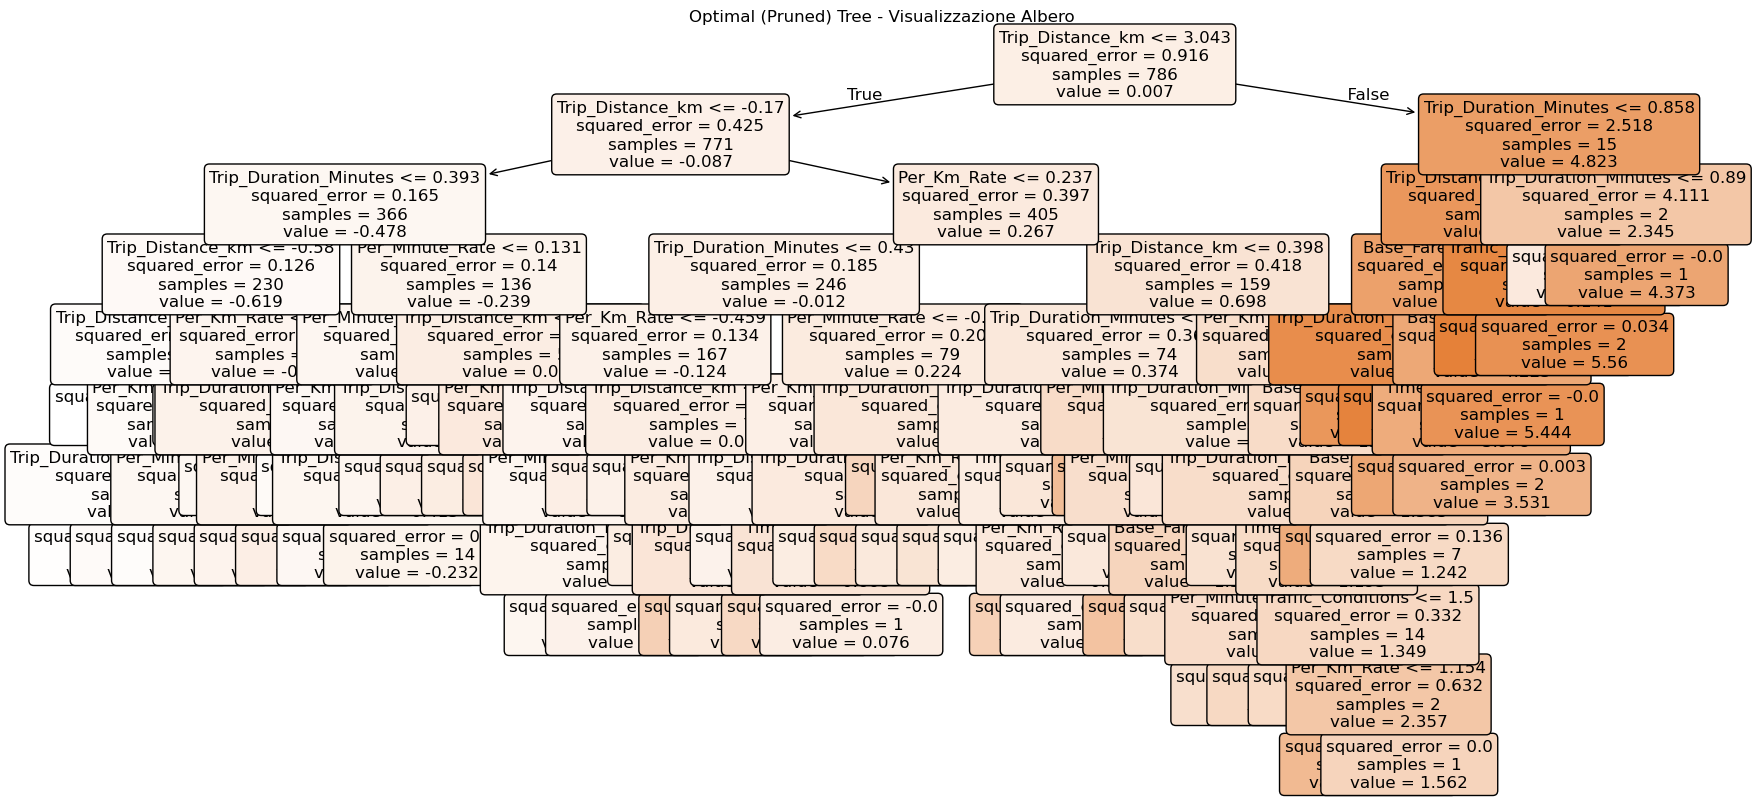

In [85]:

# Visualizza l'albero decisionale
plt.figure(figsize=(20, 10)) 
plot_tree(optimal_tree,  # il modello di regressione DecisionTree
          filled=True,  
          feature_names=X_train.columns,  # usa i nomi delle colonne del DataFrame X_train
          rounded=True,  
          fontsize=12)  # Imposta la dimensione del font
plt.title("Optimal (Pruned) Tree - Visualizzazione Albero")
plt.show()

## Random Forests

In [86]:
from sklearn.ensemble import RandomForestRegressor

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


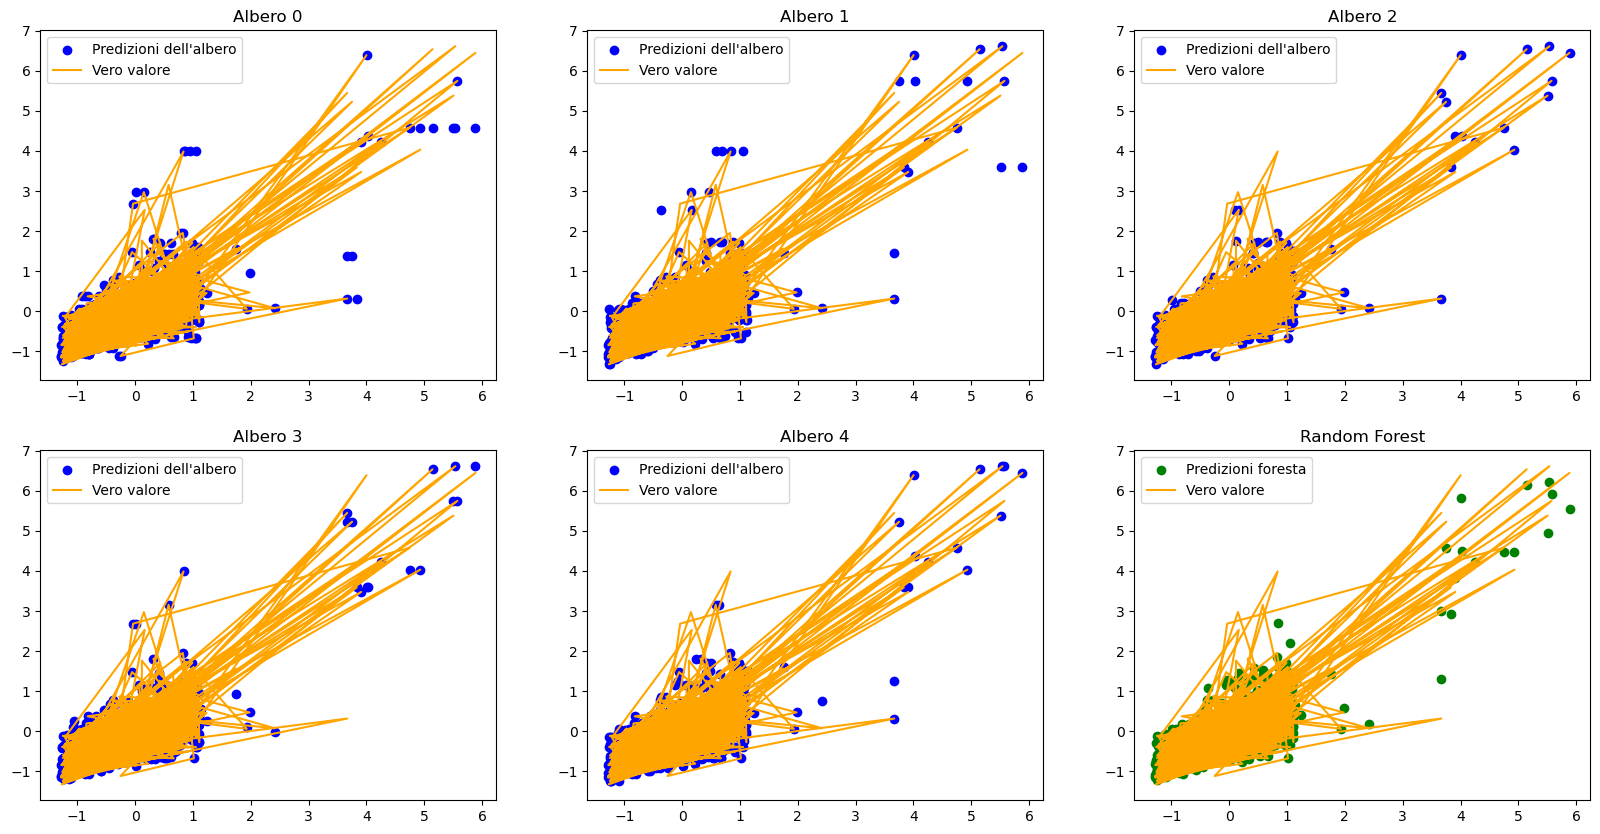

In [87]:
# Inizializza e allena il modello RandomForestRegressor
forest = RandomForestRegressor(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

# Visualizza le previsioni degli alberi individuali
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Se X_train è un DataFrame pandas:
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"Albero {i}")
    # Predizioni dell'albero per i dati di training
    tree_predictions = tree.predict(X_train)
    ax.scatter(X_train.iloc[:, 0], tree_predictions, color='blue', label="Predizioni dell'albero")
    ax.plot(X_train.iloc[:, 0], y_train, color='orange', label="Vero valore")
    ax.legend()

# Visualizza le previsioni della foresta completa
ax = axes[-1, -1]
ax.set_title("Random Forest")
forest_predictions = forest.predict(X_train)
ax.scatter(X_train.iloc[:, 0], forest_predictions, color='green', label="Predizioni foresta")
ax.plot(X_train.iloc[:, 0], y_train, color='orange', label="Vero valore")
ax.legend()


In [88]:
# Check the performance of the model
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.815


In [89]:
print(X_train.iloc[:, 0])

536   -0.423680
333   -0.099374
888    0.122780
528   -0.692944
328   -1.194775
         ...   
106    4.251532
270    0.285429
860   -0.914603
435   -0.393432
102   -0.058216
Name: Trip_Distance_km, Length: 786, dtype: float64


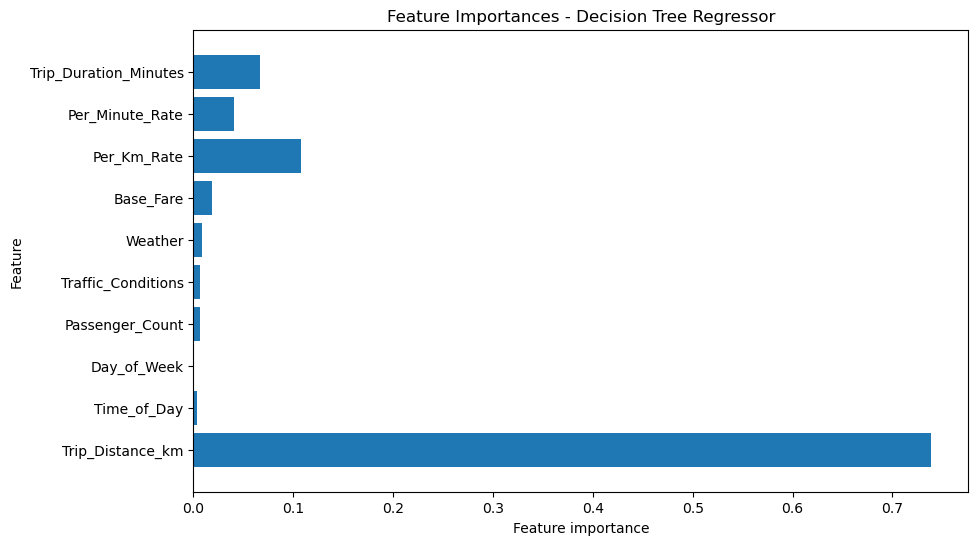

In [90]:
plot_feature_importances(forest,X_train.columns)

### Gradient Boosting

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbrt_1 = GradientBoostingRegressor(random_state=0)

# Fit the model
gbrt_1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.961
Accuracy on test set: 0.874


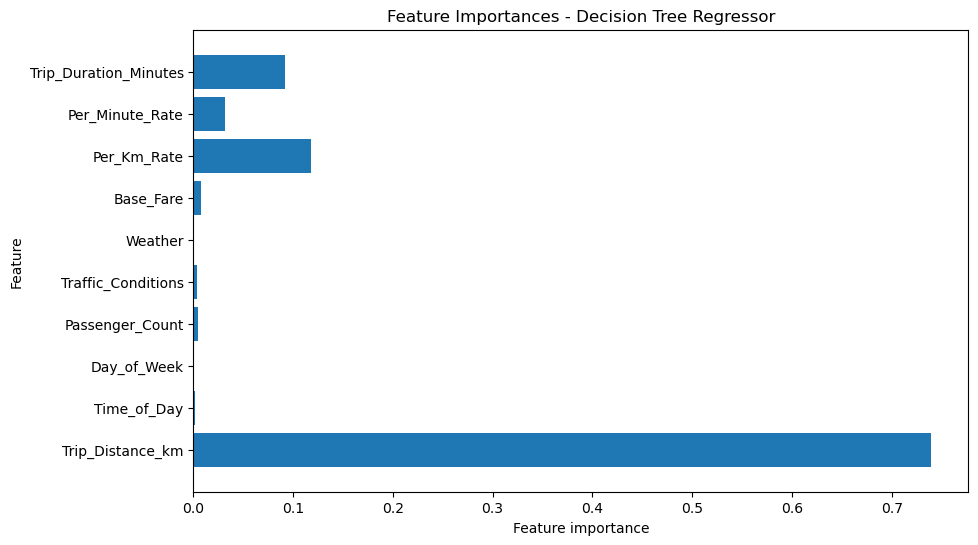

In [92]:
plot_feature_importances(gbrt_1,X_train.columns)

In [93]:
print(f"Number of trees trained: {len(gbrt_1.estimators_)}") 


Number of trees trained: 100


In [94]:
depths = [tree[0].get_depth() for tree in gbrt_1.estimators_]
print(f"Average depth: {sum(depths) / len(depths)}")
print(f"min depth: {min(depths)}, max depth: {max(depths)}")


Average depth: 3.0
min depth: 3, max depth: 3


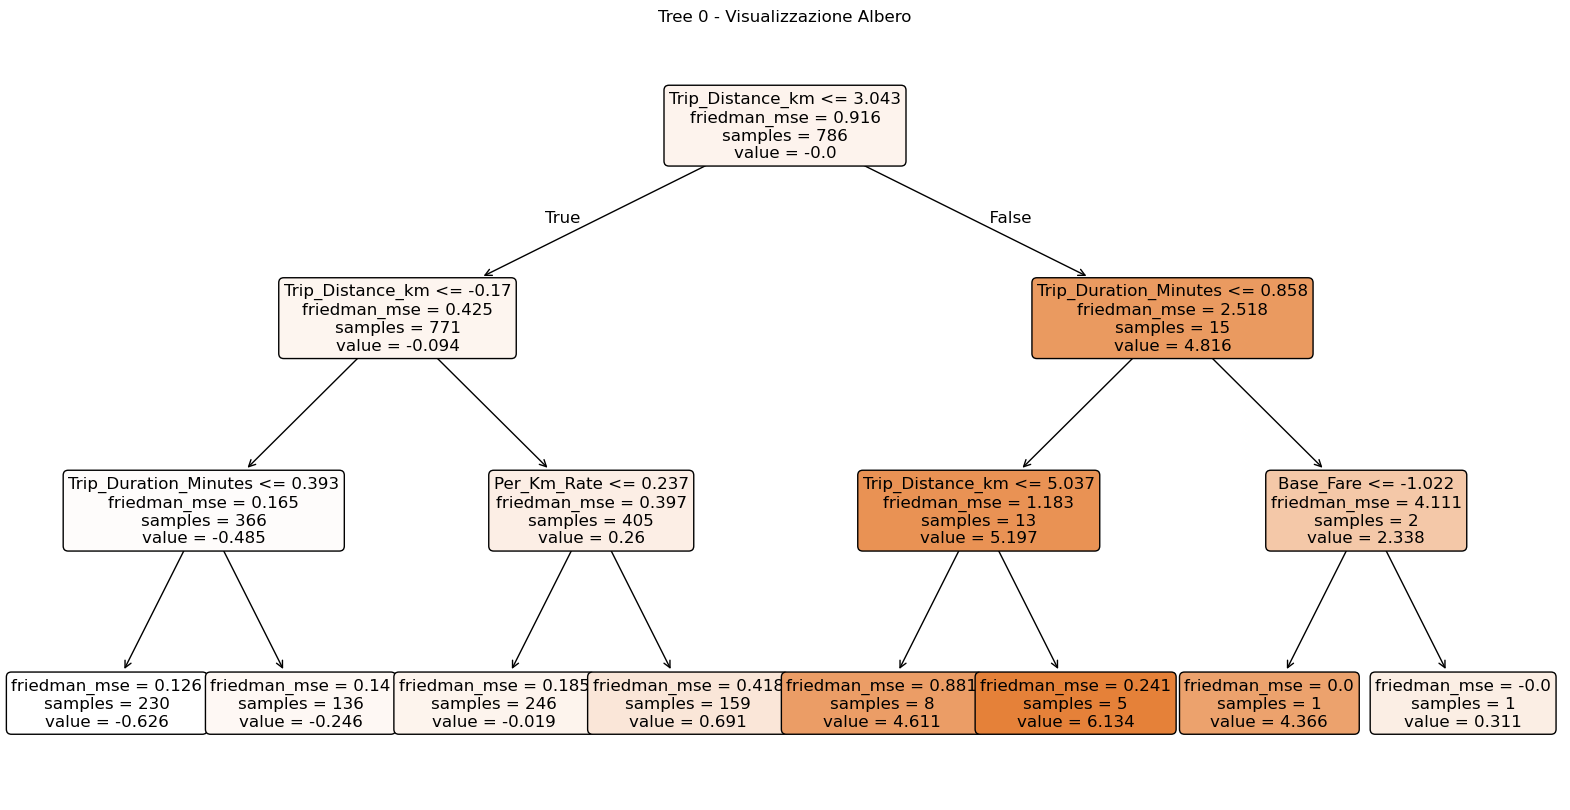

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_index = 0  # Change this to visualize different trees in the ensemble

plt.figure(figsize=(20, 10))
plot_tree(gbrt_1.estimators_[tree_index, 0],  # Access the first tree (for one output)
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12)
plt.title(f"Tree {tree_index} - Visualizzazione Albero")
plt.show()


In [96]:
# Set a specific depth for the tree (in this case a stump)
gbrt_2 = GradientBoostingRegressor(random_state=0, max_depth=1)
gbrt_2.fit(X_train, y_train)

print("Accuracy on training set (depth = 1): {:.3f}".format(gbrt_2.score(X_train, y_train)))
print("Accuracy on test set (depth = 1): {:.3f}".format(gbrt_2.score(X_test, y_test)))

Accuracy on training set (depth = 1): 0.843
Accuracy on test set (depth = 1): 0.827


In [97]:
print(f"Number of trees trained: {len(gbrt_2.estimators_)}")

Number of trees trained: 100


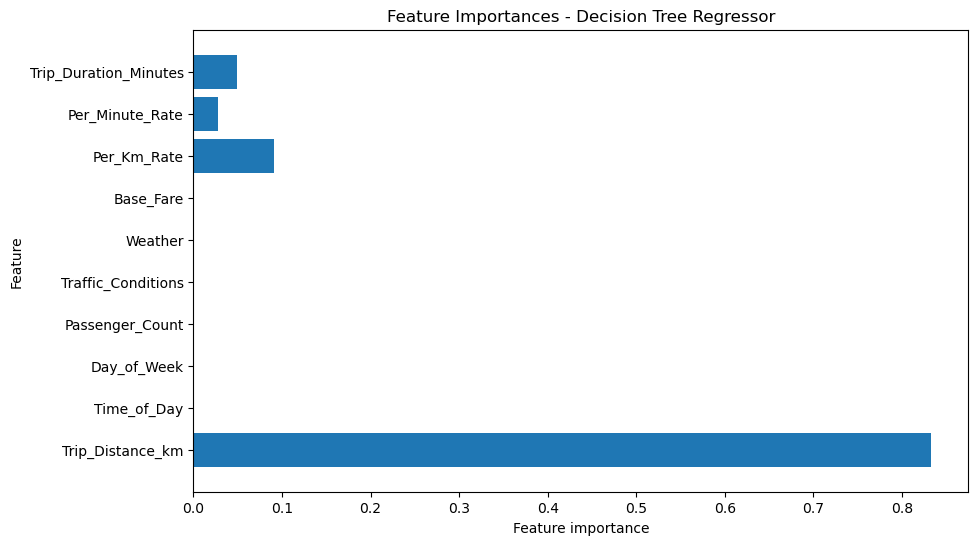

In [98]:
plot_feature_importances(gbrt_2,X_train.columns)

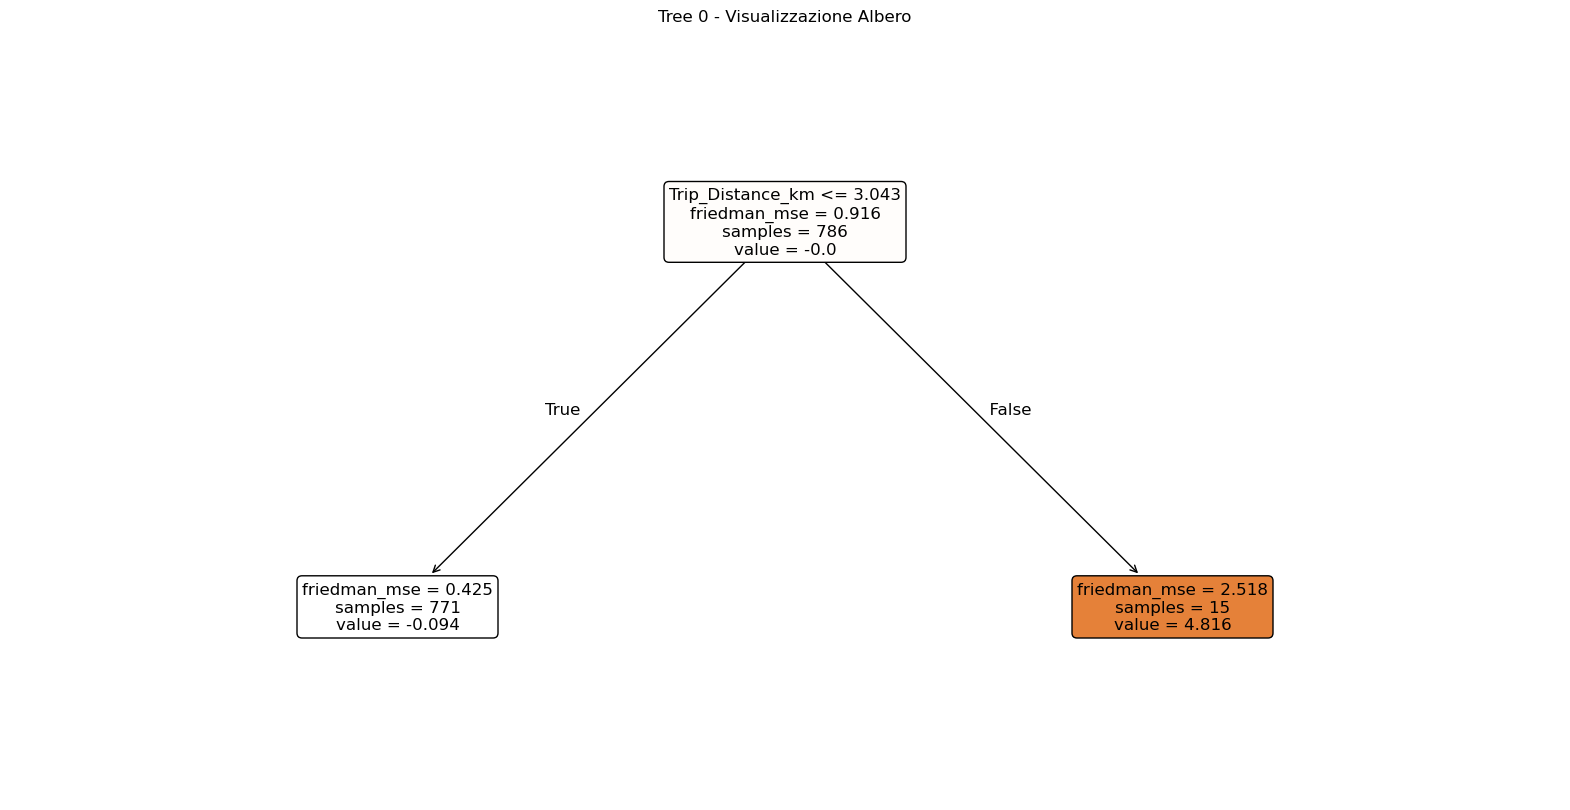

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_index = 0  # Change this to visualize different trees in the ensemble

plt.figure(figsize=(20, 10))
plot_tree(gbrt_2.estimators_[tree_index, 0],  # Access the first tree (for one output)
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12)
plt.title(f"Tree {tree_index} - Visualizzazione Albero")
plt.show()


In [100]:
# Set a specific learning rate
gbrt_3 = GradientBoostingRegressor(random_state=0, learning_rate=0.01)
gbrt_3.fit(X_train, y_train)

print("Accuracy on training set (learning rate = 0.01): {:.3f}".format(gbrt_3.score(X_train, y_train)))
print("Accuracy on test set (learning rate = 0.01): {:.3f}".format(gbrt_3.score(X_test, y_test)))

Accuracy on training set (learning rate = 0.01): 0.699
Accuracy on test set (learning rate = 0.01): 0.674


In [101]:
print(f"Number of trees trained: {len(gbrt_3.estimators_)}")
depths = [tree[0].get_depth() for tree in gbrt_3.estimators_]
print(f"Average depth: {sum(depths) / len(depths)}")
print(f"min depth: {min(depths)}, max depth: {max(depths)}")

Number of trees trained: 100
Average depth: 3.0
min depth: 3, max depth: 3


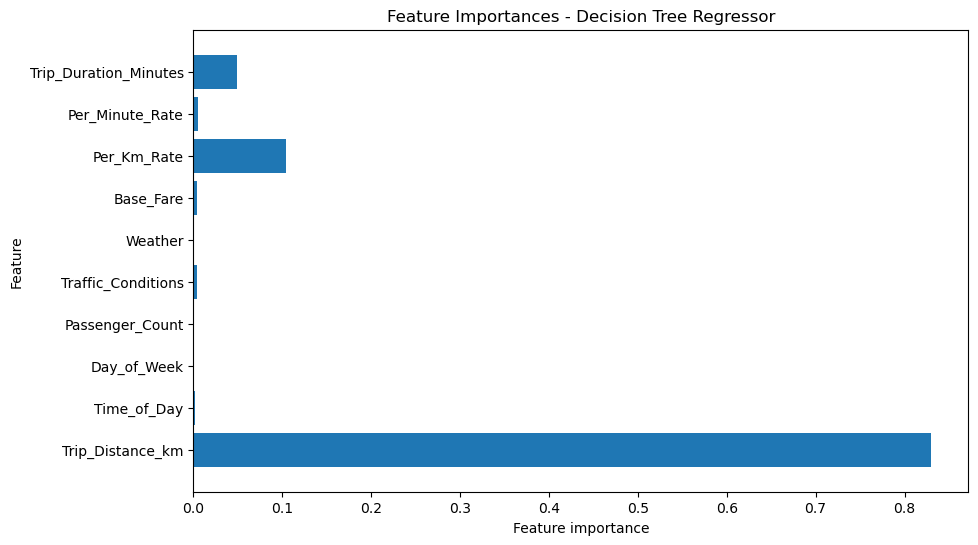

In [102]:
plot_feature_importances(gbrt_3,X_train.columns)

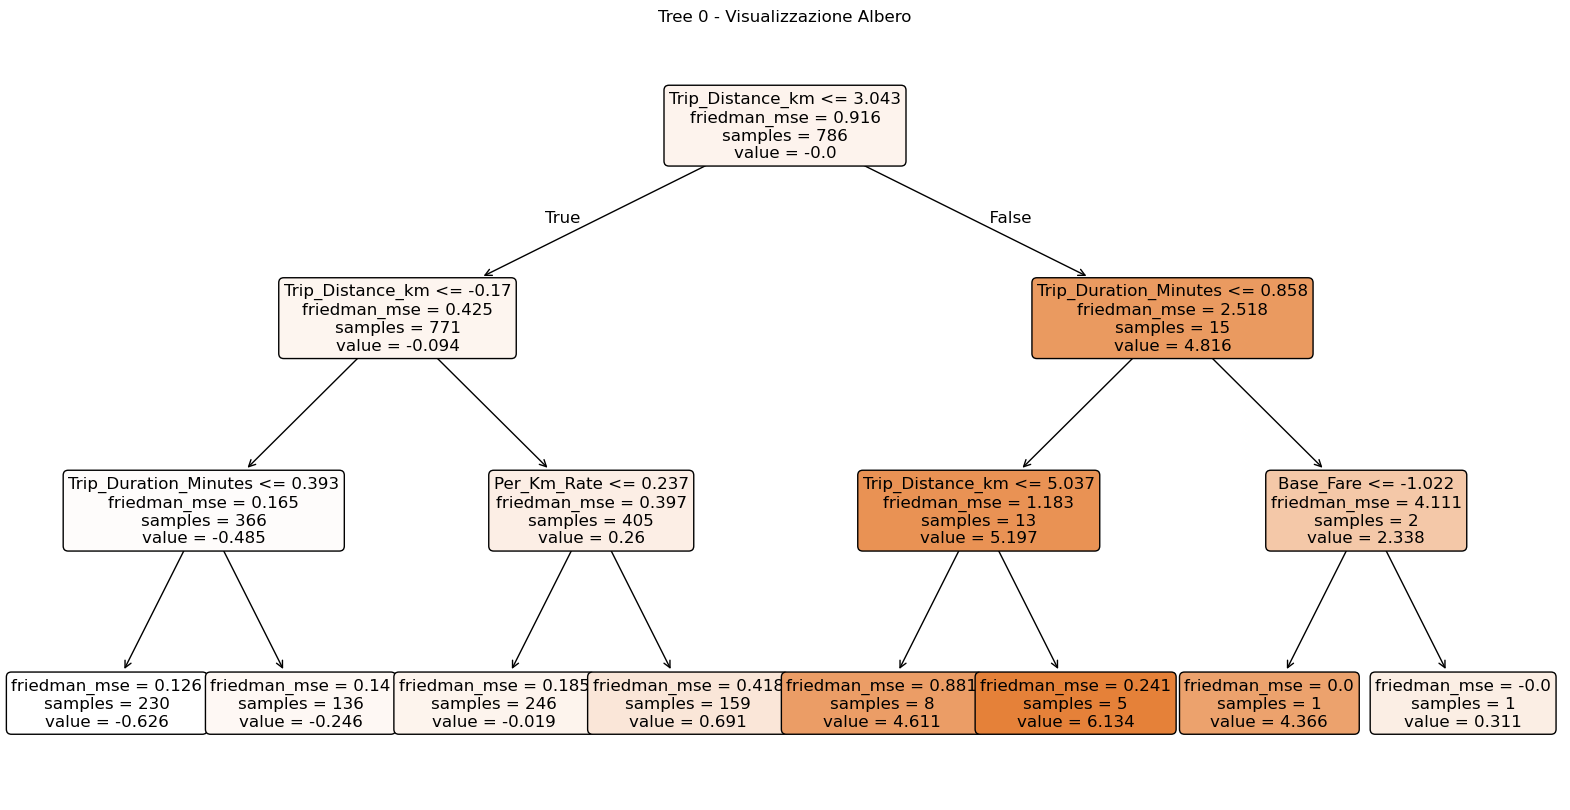

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_index = 0  # Change this to visualize different trees in the ensemble

plt.figure(figsize=(20, 10))
plot_tree(gbrt_3.estimators_[tree_index, 0],  # Access the first tree (for one output)
          filled=True,
          feature_names=X_train.columns,
          rounded=True,
          fontsize=12)
plt.title(f"Tree {tree_index} - Visualizzazione Albero")
plt.show()